# Packages

In [1]:
!pip install openai==0.28.1

In [2]:
!pip install mrtparse

In [3]:
!pip install neo4j

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

import random
import pickle
import openai

# Define Graph

In [5]:
### Defining the graph

no_of_nodes = 10 ## Number of nodes
prob_edge = 0.25 ## Probability of edge creation (Increase it if you want more)
seed = 123

G = nx.fast_gnp_random_graph(n=no_of_nodes,
                             p=prob_edge,
                             directed=True,
                             seed=seed)


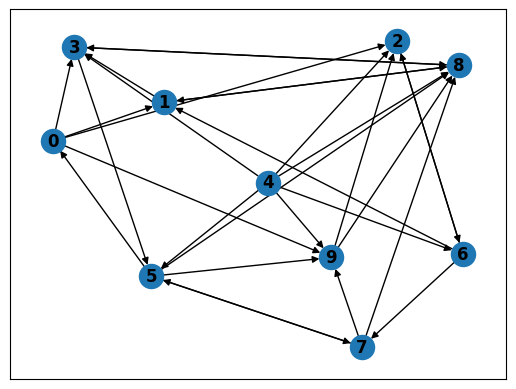

In [6]:
nx.draw_networkx(G, with_labels=True, font_weight='bold')

### Creating the list of graphs

In [7]:

node_list = [5,10,15,20,25] ## List of possible number of nodes
no_of_graphs = 10 ## Number of graphs to be generated
graph_list = []

for i in range(no_of_graphs):
    curr_node_number = random.choice(node_list)

    prob_edge = 0.2 # Probability of edge creation (Increase it if you want more edges)
    curr_G = nx.fast_gnp_random_graph(n=curr_node_number,
                             p=prob_edge,
                             directed=True,
                             seed=seed)
    graph_list.append(curr_G)


The above will generate a different set of graphs each time. Save the list as a pickle file, if you want to access a set of graphs again

In [8]:
curr_file_name = "initial_file.pkl"

with open(curr_file_name, 'wb') as f:
    pickle.dump(graph_list, f)

In [9]:
#### Run this block to load a pickle file

curr_file_name = "initial_file.pkl"

with open(curr_file_name, 'rb') as f:
    graph_list = pickle.load(f)

# Prompt Generation

### a) Describing a graph

In [10]:
## Describing a graph

def describe_graph(curr_graph,curr_num):

    """
    Function to describe a graph with nodes and edges

    input:
    curr_graph : A graph object
    curr_num : Integer to describe the graph

    output:
    graph_desc: A string object with description about the graph
    """


    graph_desc = """"""

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes = [str(each_node) for each_node in nodes]
    edges = [(str(curr_edge[0]) + " CONNECTS " + str(curr_edge[1])) for curr_edge in edges]

    graph_desc = graph_desc + """
    Graph {} has nodes {}
    and the edges are described as follows

    {}
    """.format(str(curr_num),','.join(nodes),'\n  '.join(edges))

    return graph_desc

In [11]:
# graph_desc = """"""
# i = 0

# for each_graph in graph_list:
#     graph_desc = graph_desc + describe_graph(each_graph,i)
#     i+=1

# print(graph_desc)

### b) In degree and Out degree

In [12]:
def describe_indegree(curr_graph):

    indegree_desc = """
    The indegree of the nodes are as follows
    """

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes_str = [str(each_node) for each_node in nodes]

    for k in range(len(nodes)):

        curr_node_str = nodes_str[k]
        curr_node = nodes[k]

        curr_indegree = curr_graph.in_degree(curr_node)

        indegree_desc = indegree_desc + """
        Indegree of node {} is {}""".format(curr_node_str, str(curr_indegree))

    return indegree_desc

In [13]:
def describe_outdegree(curr_graph):

    indegree_desc = """
    The outdegree of the nodes are as follows
    """

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes_str = [str(each_node) for each_node in nodes]

    for k in range(len(nodes)):

        curr_node_str = nodes_str[k]
        curr_node = nodes[k]

        curr_indegree = curr_graph.out_degree(curr_node)

        indegree_desc = indegree_desc + """
        Outdegree of node {} is {}""".format(curr_node_str, str(curr_indegree))

    return indegree_desc

In [14]:

## To generate prompts for indegree


graph_desc = """"""
i = 0

for each_graph in graph_list:
    graph_desc = graph_desc + describe_graph(each_graph,i) + describe_indegree(each_graph) + "\n"
    i+=1

print(graph_desc)



    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
    and the edges are described as follows

    0 CONNECTS 1
  0 CONNECTS 2
  0 CONNECTS 7
  0 CONNECTS 11
  0 CONNECTS 12
  0 CONNECTS 14
  0 CONNECTS 22
  1 CONNECTS 3
  1 CONNECTS 6
  1 CONNECTS 9
  1 CONNECTS 12
  1 CONNECTS 16
  1 CONNECTS 18
  1 CONNECTS 20
  2 CONNECTS 3
  2 CONNECTS 6
  2 CONNECTS 7
  2 CONNECTS 12
  2 CONNECTS 14
  2 CONNECTS 17
  2 CONNECTS 20
  2 CONNECTS 24
  3 CONNECTS 9
  3 CONNECTS 22
  3 CONNECTS 23
  4 CONNECTS 8
  4 CONNECTS 9
  4 CONNECTS 10
  4 CONNECTS 15
  4 CONNECTS 17
  5 CONNECTS 8
  5 CONNECTS 10
  5 CONNECTS 4
  6 CONNECTS 15
  6 CONNECTS 16
  6 CONNECTS 4
  7 CONNECTS 8
  7 CONNECTS 9
  7 CONNECTS 10
  7 CONNECTS 17
  7 CONNECTS 18
  7 CONNECTS 22
  7 CONNECTS 0
  7 CONNECTS 3
  7 CONNECTS 4
  8 CONNECTS 9
  9 CONNECTS 12
  9 CONNECTS 13
  9 CONNECTS 19
  9 CONNECTS 20
  9 CONNECTS 21
  9 CONNECTS 22
  9 CONNECTS 23
  10 CONNECTS 12
  10 CONNECTS 16
  10 

In [15]:

## To generate prompts for outdegree

graph_desc = """"""
i = 0

for each_graph in graph_list:
    graph_desc = graph_desc + describe_graph(each_graph,i) + describe_outdegree(each_graph) + "\n"
    i+=1

print(graph_desc)



    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
    and the edges are described as follows

    0 CONNECTS 1
  0 CONNECTS 2
  0 CONNECTS 7
  0 CONNECTS 11
  0 CONNECTS 12
  0 CONNECTS 14
  0 CONNECTS 22
  1 CONNECTS 3
  1 CONNECTS 6
  1 CONNECTS 9
  1 CONNECTS 12
  1 CONNECTS 16
  1 CONNECTS 18
  1 CONNECTS 20
  2 CONNECTS 3
  2 CONNECTS 6
  2 CONNECTS 7
  2 CONNECTS 12
  2 CONNECTS 14
  2 CONNECTS 17
  2 CONNECTS 20
  2 CONNECTS 24
  3 CONNECTS 9
  3 CONNECTS 22
  3 CONNECTS 23
  4 CONNECTS 8
  4 CONNECTS 9
  4 CONNECTS 10
  4 CONNECTS 15
  4 CONNECTS 17
  5 CONNECTS 8
  5 CONNECTS 10
  5 CONNECTS 4
  6 CONNECTS 15
  6 CONNECTS 16
  6 CONNECTS 4
  7 CONNECTS 8
  7 CONNECTS 9
  7 CONNECTS 10
  7 CONNECTS 17
  7 CONNECTS 18
  7 CONNECTS 22
  7 CONNECTS 0
  7 CONNECTS 3
  7 CONNECTS 4
  8 CONNECTS 9
  9 CONNECTS 12
  9 CONNECTS 13
  9 CONNECTS 19
  9 CONNECTS 20
  9 CONNECTS 21
  9 CONNECTS 22
  9 CONNECTS 23
  10 CONNECTS 12
  10 CONNECTS 16
  10 

## c) Describe BGP graph

In [16]:
import json
import sys
from mrtparse import *
import networkx as nx
import matplotlib.pyplot as plt

import os
import requests
import gzip
import shutil
import openai

from neo4j import GraphDatabase

In [17]:
server_url = "https://data.ris.ripe.net"
rrc_name = "rrc00"
year = "2017"
month = "09"
date = "01"
time = "0800"

zip_file_name = "bview.{}{}{}.{}.gz".format(year,month,date,time)
filename = "bview.{}{}{}.{}".format(year,month,date,time)

remote_url = server_url + "/" + rrc_name + "/" + year + "." + month + "/" + zip_file_name
print(remote_url)

https://data.ris.ripe.net/rrc00/2017.09/bview.20170901.0800.gz


In [18]:
r = requests.get(remote_url, allow_redirects=True)

if(r.status_code==200):

    ## Removing the zip file if it exists
    if os.path.isfile(zip_file_name):
        os.remove(zip_file_name)

    ## Removing content file if it exists
    if os.path.isfile(filename):
        os.remove(filename)

    ## Obtaining the zip file
    with open(zip_file_name, 'wb') as f:
        f.write(r.content)

    ## Obtaining the content file
    with gzip.open(zip_file_name, 'rb') as f_in:
        with open(filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    ## Removing the zip file after extraction
    if os.path.isfile(zip_file_name):
        os.remove(zip_file_name)
else:
    print('File does not exist')

In [19]:
# Creating graph in networkx
#edge_connections = ""

G = nx.DiGraph()
node_check = []

i = 0
for entry in Reader(filename):

    curr_json = entry.data
    #check_json.append(curr_json)

    if list(curr_json['subtype'].values())[0]== "RIB_IPV4_UNICAST":

        if 'rib_entries' in curr_json.keys():

            entry_count = curr_json.get('entry_count',0)
            for j in range(entry_count):
                curr_list = curr_json['rib_entries'][j]['path_attributes'][1]['value'][0]['value']
                #check_list.append(curr_list)

                N = len(curr_list)
                for k in range(N-1):
                    if(curr_list[k+1]!=curr_list[k]): ## Avoiding same node cycles
                        G.add_edge(curr_list[k+1],curr_list[k])
                        node_check.append(curr_list[k+1])
                        node_check.append(curr_list[k])
        else:
            curr_list = curr_json['path_attributes'][1]['value'][0]['value']
            #check_list.append(curr_list)

            N = len(curr_list)
            for k in range(N-1):
                if(curr_list[k+1]!=curr_list[k]):
                    G.add_edge(curr_list[k+1],curr_list[k])
                    node_check.append(curr_list[k+1])
                    node_check.append(curr_list[k])


        i += 1

    if(i==20):
        break

#print(len(list(set(node_check))))

In [20]:
# Describing BGP graph in formatted string
formatted_string = ""
connect_list = []

i = 0
for entry in Reader(filename):

    curr_json = entry.data
    #check_json.append(curr_json)

    if list(curr_json['subtype'].values())[0]== "RIB_IPV4_UNICAST":

        if 'rib_entries' in curr_json.keys():

            entry_count = curr_json.get('entry_count',0)
            for j in range(entry_count):
                curr_list = curr_json['rib_entries'][j]['path_attributes'][1]['value'][0]['value']
                #check_list.append(curr_list)

                N = len(curr_list)
                for k in range(N-1):
                    if(curr_list[k+1]!=curr_list[k]): ## Avoiding same node cycles
                        connect_list.append(curr_list[k+1] + " CONNECTS " + curr_list[k])
                        #connect_list.append(curr_list[k+1] + " is connected to " + curr_list[k])
        else:
            curr_list = curr_json['path_attributes'][1]['value'][0]['value']
            #check_list.append(curr_list)

            N = len(curr_list)
            for k in range(N-1):
                if(curr_list[k+1]!=curr_list[k]):
                    connect_list.append(curr_list[k+1] + " CONNECTS " + curr_list[k])
                    #connect_list.append(curr_list[k+1] + " is connected to " + curr_list[k])


        i += 1

    if(i==20):
        break

connect_list = list(set(connect_list))
formatted_string = "\n".join(connect_list)
#print(formatted_string)

In [21]:
context = formatted_string

## Prompts for fine tuning

This prompt makes use of few shot learning, where the LLM is fed few examples of how an ideal graph should work.

In [22]:
curr_graph = graph_list[0]


curr_list = []

system_prompt = """
You are an assistant that is an expert in graph operations that should memorize the inputs given initially without forgetting them. These
would contain information about a graph. Using the given information you should answer the questions that follow.
Do not add any additional information that is not explicitly provided in the latest prompt.
I repeat, do not add any information that is not explicitly given.
"""

curr_list.append({"role":"system","content":system_prompt})

## User prompt (Question)
user_prompt = describe_graph(curr_graph,0) + """
What are the indegrees of this graph
"""
curr_list.append({"role":"user","content":user_prompt})

## Assistant prompt (Answer)
assistant_prompt = describe_indegree(curr_graph)
curr_list.append({"role":"assistant","content":assistant_prompt})

overall_message = {"message":curr_list}

print(overall_message)

{'message': [{'role': 'system', 'content': '\nYou are an assistant that is an expert in graph operations that should memorize the inputs given initially without forgetting them. These\nwould contain information about a graph. Using the given information you should answer the questions that follow.\nDo not add any additional information that is not explicitly provided in the latest prompt.\nI repeat, do not add any information that is not explicitly given.\n'}, {'role': 'user', 'content': '\n    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24\n    and the edges are described as follows\n\n    0 CONNECTS 1\n  0 CONNECTS 2\n  0 CONNECTS 7\n  0 CONNECTS 11\n  0 CONNECTS 12\n  0 CONNECTS 14\n  0 CONNECTS 22\n  1 CONNECTS 3\n  1 CONNECTS 6\n  1 CONNECTS 9\n  1 CONNECTS 12\n  1 CONNECTS 16\n  1 CONNECTS 18\n  1 CONNECTS 20\n  2 CONNECTS 3\n  2 CONNECTS 6\n  2 CONNECTS 7\n  2 CONNECTS 12\n  2 CONNECTS 14\n  2 CONNECTS 17\n  2 CONNECTS 20\n  2 CONNECTS 24\n  3

In [23]:
def generate_user_prompt(question, context):
   return f"""
   The question is {question}
   Answer the question by using the provided information:
   {context}
   """

In [24]:
def get_gpt3_response(system_prompt, prompt, context, api_key, model="gpt-3.5-turbo"):
    """
    Send a request to the OpenAI Chat API and get a response from the model.

    Args:
        prompt (str): The user's question.
        context (str): Contextual information to be passed to the model.
        api_key (str): Your OpenAI API key.
        model (str): The model version to use, default is "gpt-3.5-turbo".

    Returns:
        str: The model's response.
    """

    # Create the full prompt by combining the system prompt, context, and the user question
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": generate_user_prompt(prompt, context)}
    ]

    # Use the OpenAI Python client to send the request
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages
    )

    # Extract the response text and return
    return response.choices[0].message['content']

# You will need to install the openai Python package to use this function and also have a valid API key.


In [25]:
# Define your API key (keep it secret!)
API_KEY = "#Enter API Key Here"
openai.api_key = "#Enter API Key Here"

In [26]:
# Indegree
question = "What is the indegree of all nodes?"
context_info = context
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The indegree of each node is as follows:
 
Node 4651: 10
Node 23969: 1
Node 2497: 3
Node 2516: 16
Node 2914: 3
Node 56203: 1
Node 6939: 14
Node 18144: 1
Node 9737: 1
Node 4826: 7
Node 3257: 6
Node 3356: 10
Node 18144: 1
Node 56203: 1
Node 22562: 1
Node 50300: 5
Node 1299: 4
Node 22652: 6
Node 209: 1
Node 38803: 2
Node 50304: 7
Node 1103: 2
Node 10026: 5
Node 42708: 2
Node 6762: 5
Node 4637: 5
Node 6820: 1
Node 4766: 1
Node 1221: 3
Node 2519: 3
Node 1136: 2
Node 4713: 1
Node 12586: 3
Node 4844: 2
Node 57821: 2
Node 173: 1
Node 8220: 2
Node 45896: 5
Node 8758: 4
Node 6453: 2
Node 174: 2
Node 7670: 3
Node 3333: 4
Node 6830: 1


In [27]:
# Outdegree
question = "What is the outdegree of all nodes?"
context_info = context
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

To find the outdegree of all nodes, we need to count the number of connections each node has. Let's go through the provided information and count the outdegree for each node:

Node 4651 has an outdegree of 8.
Node 23969 has an outdegree of 1.
Node 2497 has an outdegree of 2.
Node 2516 has an outdegree of 9.
Node 2914 has an outdegree of 3.
Node 56203 has an outdegree of 1.
Node 6939 has an outdegree of 10.
Node 18144 has an outdegree of 1.
Node 9737 has an outdegree of 1.
Node 4826 has an outdegree of 6.
Node 3257 has an outdegree of 5.
Node 3356 has an outdegree of 7.
Node 4766 has an outdegree of 1.
Node 10026 has an outdegree of 4.
Node 209 has an outdegree of 1.
Node 38803 has an outdegree of 3.
Node 1221 has an outdegree of 3.
Node 50304 has an outdegree of 5.
Node 2519 has an outdegree of 3.
Node 42708 has an outdegree of 2.
Node 1103 has an outdegree of 2.
Node 1299 has an outdegree of 3.
Node 31025 has an outdegree of 2.
Node 6762 has an outdegree of 3.
Node 4637 has an outdegr